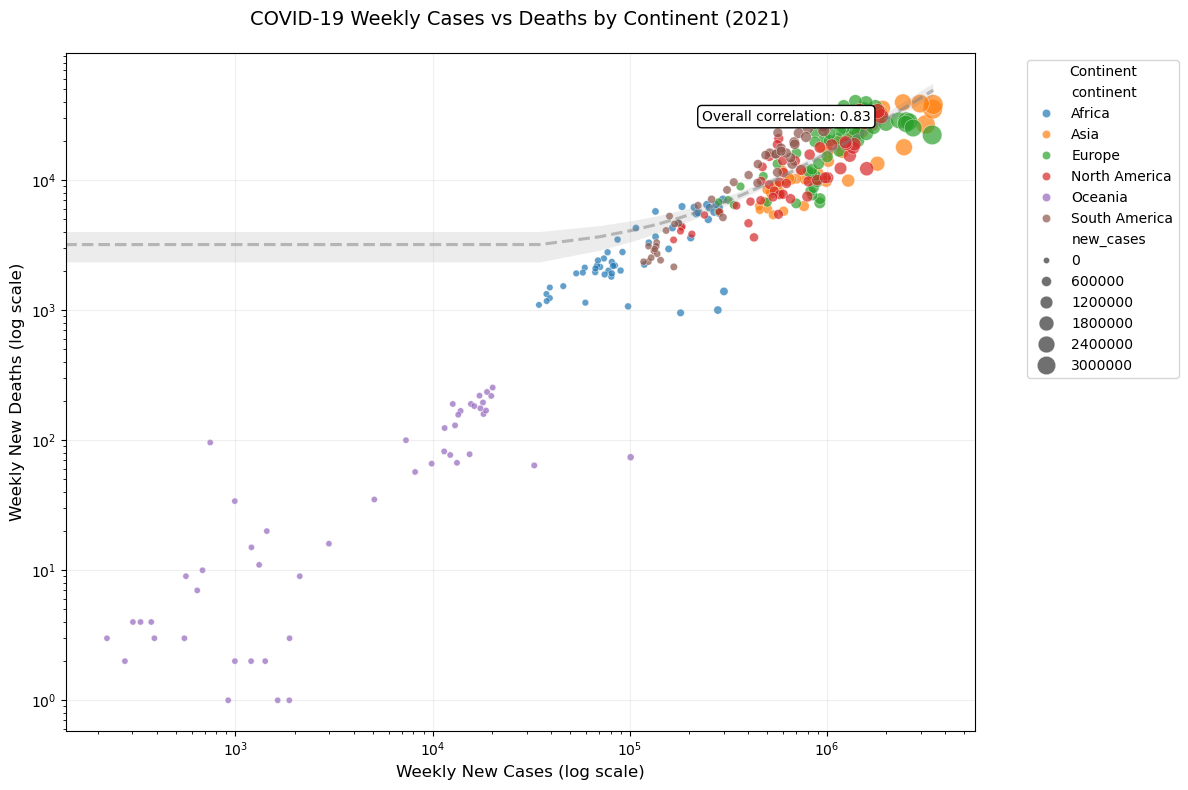

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Filter and clean data
df = df[['date', 'continent', 'location', 'new_cases', 'new_deaths']].dropna()
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'].dt.year == 2021]  # Focus on 2021

# Create weekly aggregates by continent
weekly_df = df.groupby(['continent', pd.Grouper(key='date', freq='W')]).agg({
    'new_cases': 'sum',
    'new_deaths': 'sum'
}).reset_index()

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=weekly_df,
    x="new_cases",
    y="new_deaths",
    hue="continent",
    palette="tab10",
    size="new_cases",  # Size by case count
    sizes=(20, 200),   # Size range
    alpha=0.7
)

# Add regression lines
sns.regplot(
    data=weekly_df,
    x="new_cases",
    y="new_deaths",
    scatter=False,
    color="gray",
    line_kws={'linestyle': '--', 'alpha': 0.5}
)

# Calculate and display overall correlation
corr = weekly_df[['new_cases', 'new_deaths']].corr().iloc[0,1]
plt.annotate(f'Overall correlation: {corr:.2f}',
             xy=(0.7, 0.9),
             xycoords='axes fraction',
             bbox=dict(boxstyle='round', facecolor='white'))

# Formatting
plt.title("COVID-19 Weekly Cases vs Deaths by Continent (2021)", fontsize=14, pad=20)
plt.xlabel("Weekly New Cases (log scale)", fontsize=12)
plt.ylabel("Weekly New Deaths (log scale)", fontsize=12)
plt.xscale('log')  # Log scale for better visualization
plt.yscale('log')
plt.grid(True, alpha=0.2)
plt.legend(title="Continent", bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

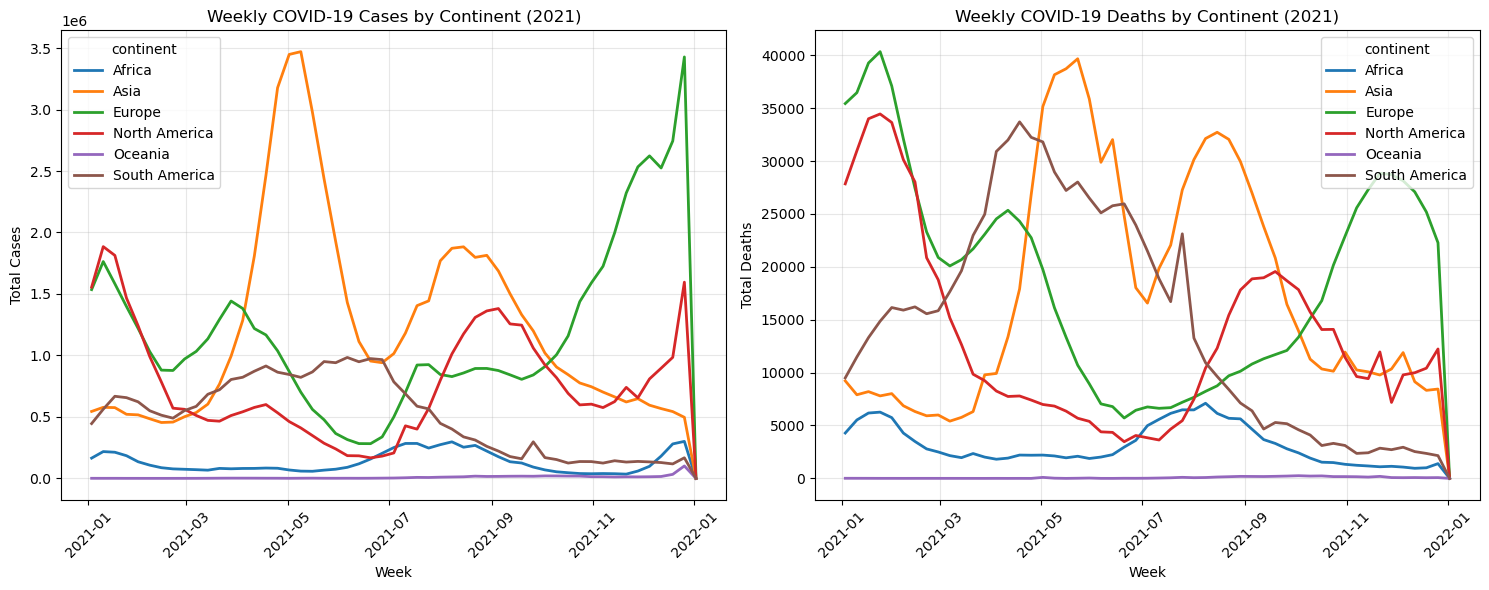

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Load dataset
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Filter and clean data
df = df[['date', 'continent', 'location', 'new_cases', 'new_deaths']].dropna()
df['date'] = pd.to_datetime(df['date'])

# Filter to 2021 data only (peak pandemic period with more complete records)
df = df[df['date'].dt.year == 2021]

# Create weekly aggregates by continent
weekly_df = df.groupby(['continent', pd.Grouper(key='date', freq='W')]).agg({
    'new_cases': 'sum',
    'new_deaths': 'sum'
}).reset_index()

# Create two separate plots
plt.figure(figsize=(15, 6))

# Plot 1: Weekly New Cases
plt.subplot(1, 2, 1)
sns.lineplot(
    data=weekly_df,
    x="date",
    y="new_cases",
    hue="continent",
    palette="tab10",
    linewidth=2
)
plt.title("Weekly COVID-19 Cases by Continent (2021)")
plt.xlabel("Week")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 2: Weekly New Deaths
plt.subplot(1, 2, 2)
sns.lineplot(
    data=weekly_df,
    x="date",
    y="new_deaths",
    hue="continent",
    palette="tab10",
    linewidth=2
)
plt.title("Weekly COVID-19 Deaths by Continent (2021)")
plt.xlabel("Week")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Loading data...


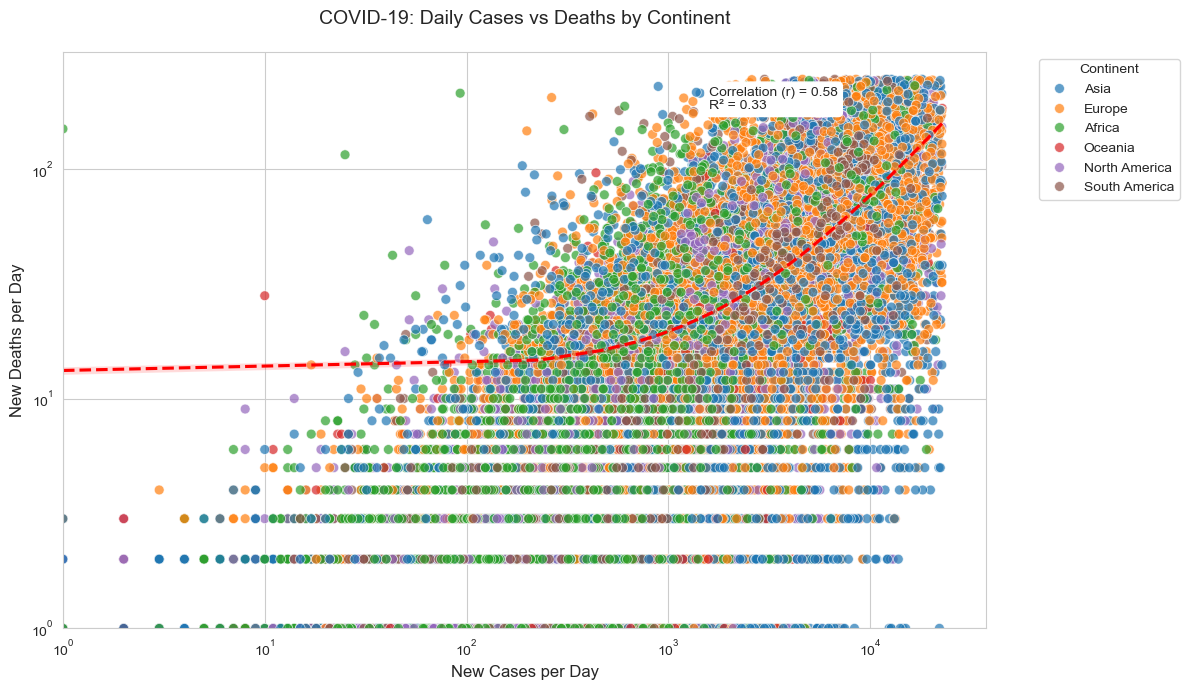

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Load data
print("Loading data...")
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)
plot_df = df[['continent', 'location', 'new_cases', 'new_deaths']].dropna()

# Filter outliers and negative values
q_case = plot_df['new_cases'].quantile(0.99)
q_death = plot_df['new_deaths'].quantile(0.99)
filtered_df = plot_df[
    (plot_df['new_cases'] <= q_case) & 
    (plot_df['new_cases'] > 0) &
    (plot_df['new_deaths'] <= q_death) &
    (plot_df['new_deaths'] > 0)
]

# Calculate correlation
correlation = filtered_df[['new_cases', 'new_deaths']].corr().iloc[0,1]
r_squared = correlation ** 2

# ======================
# MAIN SCATTER PLOT
# ======================
plt.figure(figsize=(12, 7))

# Create plot with colored continents
scatter = sns.scatterplot(
    data=filtered_df,
    x="new_cases",
    y="new_deaths",
    hue="continent",
    palette="tab10",
    alpha=0.7,
    s=50
)

# Add regression line
sns.regplot(
    data=filtered_df,
    x="new_cases",
    y="new_deaths",
    scatter=False,
    color="red",
    line_kws={'linestyle': '--'}
)

# Add correlation info
plt.annotate(
    f'Correlation (r) = {correlation:.2f}\nR² = {r_squared:.2f}',
    xy=(0.7, 0.9),
    xycoords='axes fraction',
    bbox=dict(boxstyle='round', facecolor='white')
)

# Formatting
plt.title("COVID-19: Daily Cases vs Deaths by Continent", pad=20, fontsize=14)
plt.xlabel("New Cases per Day", fontsize=12)
plt.ylabel("New Deaths per Day", fontsize=12)
plt.legend(title="Continent", bbox_to_anchor=(1.05, 1))

# Use log scale for better visibility
plt.xscale('log')
plt.yscale('log')
plt.xlim(left=1)
plt.ylim(bottom=1)

plt.tight_layout()
plt.show()


Pearson Correlation Results:
Correlation coefficient: 0.289
P-value: 0.000e+00


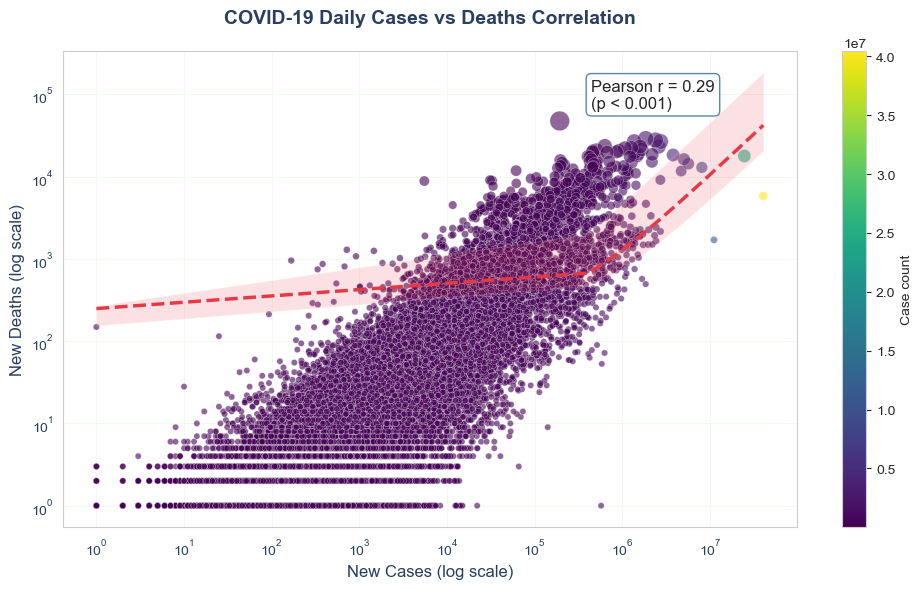

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Load and prepare data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)
df = df[['date', 'continent', 'location', 'new_cases', 'new_deaths']].dropna()
df = df[(df['new_cases'] > 0) & (df['new_deaths'] > 0)]  # Remove zeros for log scaling

# Hypothesis testing
corr, p_value = pearsonr(df["new_cases"], df["new_deaths"])
print(f"\nPearson Correlation Results:")
print(f"Correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3e}")

# Create color palette
palette = sns.color_palette("viridis", as_cmap=True)

# Create scatter plot with enhanced styling
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x="new_cases",
    y="new_deaths",
    hue=df['new_cases'],  # Color gradient by case count
    palette=palette,
    size=df['new_deaths'],  # Size by death count
    sizes=(20, 200),
    alpha=0.6,
    edgecolor='white',
    linewidth=0.3
)

# Add regression line
sns.regplot(
    data=df,
    x="new_cases",
    y="new_deaths",
    scatter=False,
    color='#e63946',  # Attractive red
    line_kws={'linewidth': 2.5, 'linestyle': '--'}
)

# Add correlation annotation
plt.annotate(
    f'Pearson r = {corr:.2f}\n(p < 0.001)',
    xy=(0.72, 0.88),
    xycoords='axes fraction',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', edgecolor='#457b9d', alpha=0.9)
)

# Formatting
plt.title("COVID-19 Daily Cases vs Deaths Correlation", 
         fontsize=14, pad=20, color='#2a3f5f', fontweight='bold')
plt.xlabel("New Cases (log scale)", fontsize=12, color='#2a3f5f')
plt.ylabel("New Deaths (log scale)", fontsize=12, color='#2a3f5f')
plt.xscale('log')
plt.yscale('log')

# Customize grid and ticks
plt.grid(True, color='#f1faee', linewidth=0.7)
plt.tick_params(colors='#2a3f5f')

# Remove legend (optional - can keep if needed)
scatter.legend_.remove()

# Add colorbar
norm = plt.Normalize(df['new_cases'].min(), df['new_cases'].max())
sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Case count', ax=scatter)

plt.tight_layout()
plt.show()


BIVARIATE REGRESSION ANALYSIS RESULTS
                            OLS Regression Results                            
Dep. Variable:             log_deaths   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                 5.707e+04
Date:                Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                        01:24:20   Log-Likelihood:                -19300.
No. Observations:               24777   AIC:                         3.860e+04
Df Residuals:                   24775   BIC:                         3.862e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

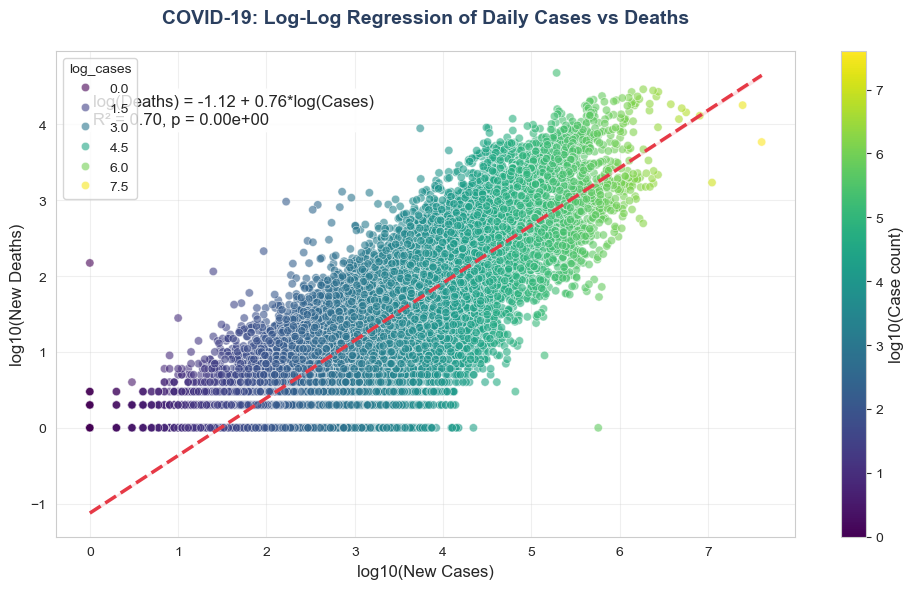

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Load and prepare data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)
df = df[['date', 'continent', 'location', 'new_cases', 'new_deaths']].dropna()
df = df[(df['new_cases'] > 0) & (df['new_deaths'] > 0)]  # Remove zeros for log scaling

# Log-transform variables for better linear fit
df['log_cases'] = np.log10(df['new_cases'])
df['log_deaths'] = np.log10(df['new_deaths'])

# Bivariate Regression Analysis
X = df['log_cases']  # Independent variable
y = df['log_deaths']  # Dependent variable
X = sm.add_constant(X)  # Add intercept term

model = sm.OLS(y, X).fit()

# Print regression results
print("\n" + "="*60)
print("BIVARIATE REGRESSION ANALYSIS RESULTS")
print("="*60)
print(model.summary())
print("\nKey Interpretation:")
print(f"- Each 10-fold increase in cases predicts a {10**model.params.iloc[1]:.2f}-fold increase in deaths")
print(f"- The model explains {model.rsquared:.1%} of variance in death counts")
print(f"- The relationship is statistically significant (p = {model.pvalues.iloc[1]:.2e})")

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with color gradient
scatter = sns.scatterplot(
    x='log_cases',
    y='log_deaths',
    data=df,
    hue='log_cases',
    palette='viridis',
    alpha=0.6,
    edgecolor='w',
    linewidth=0.5,
    ax=ax
)

# Regression line
sns.regplot(
    x='log_cases',
    y='log_deaths',
    data=df,
    scatter=False,
    color='#e63946',
    line_kws={'linewidth': 2.5, 'linestyle': '--'},
    ax=ax
)

# Add regression equation
equation = (f"log(Deaths) = {model.params.iloc[0]:.2f} + {model.params.iloc[1]:.2f}*log(Cases)\n"
            f"R² = {model.rsquared:.2f}, p = {model.pvalues.iloc[1]:.2e}")
ax.annotate(equation,
            xy=(0.05, 0.85),
            xycoords='axes fraction',
            fontsize=12,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# Formatting
ax.set_title("COVID-19: Log-Log Regression of Daily Cases vs Deaths", 
            fontsize=14, pad=20, color='#2a3f5f', fontweight='bold')
ax.set_xlabel("log10(New Cases)", fontsize=12)
ax.set_ylabel("log10(New Deaths)", fontsize=12)
ax.grid(True, alpha=0.3)

# Add colorbar using the existing scatter plot's colormap
norm = plt.Normalize(df['log_cases'].min(), df['log_cases'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('log10(Case count)', fontsize=12)

plt.tight_layout()
plt.show()

X and y index match: True
                            OLS Regression Results                            
Dep. Variable:             new_deaths   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 4.989e+04
Date:                Sun, 06 Apr 2025   Prob (F-statistic):               0.00
Time:                        01:25:28   Log-Likelihood:                -37359.
No. Observations:               27548   AIC:                         7.473e+04
Df Residuals:                   27544   BIC:                         7.476e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.123

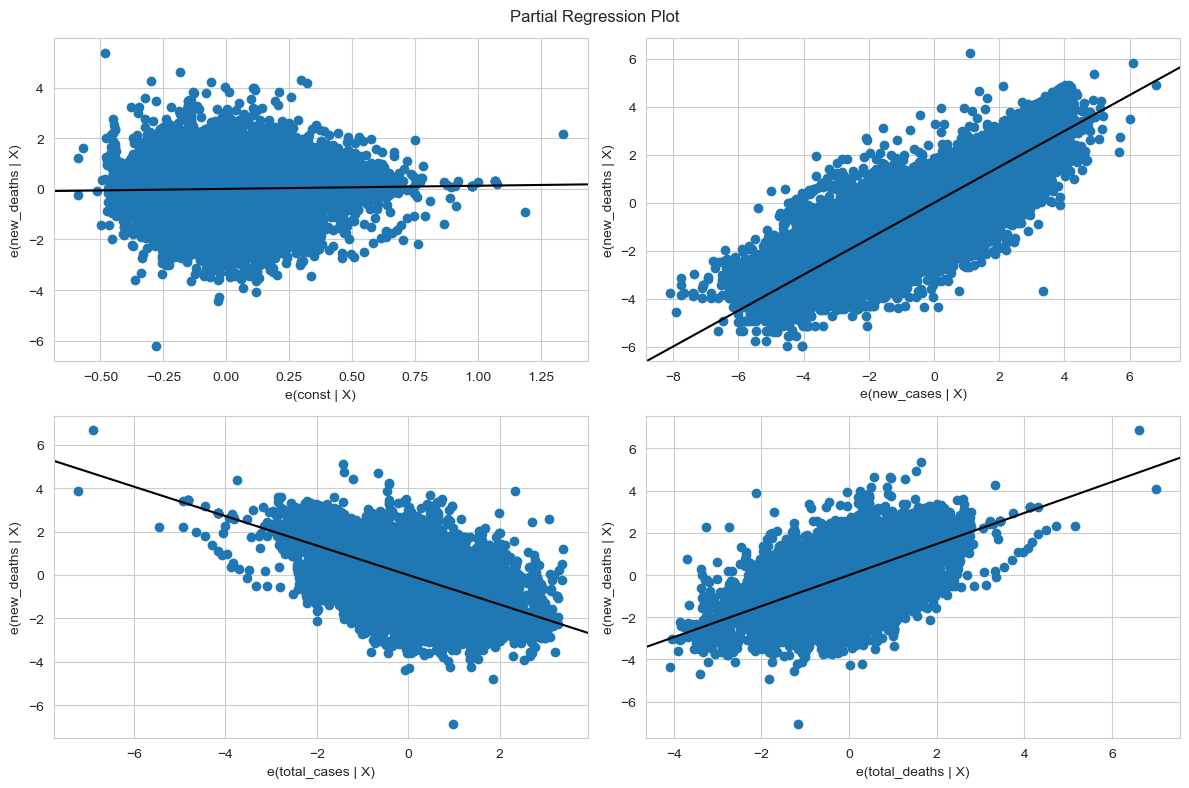

In [6]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load and clean data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# 1. Select required columns and drop NAs
model_data = df[['new_cases', 'total_cases', 'total_deaths', 'new_deaths']].dropna()

# 2. Filter positive values only (for log transform)
model_data = model_data[(model_data > 0).all(axis=1)].copy()

# 3. Apply log transform
log_data = model_data.apply(np.log1p)

# 4. Prepare X and y from THE SAME DataFrame
X = log_data[['new_cases', 'total_cases', 'total_deaths']]
y = log_data['new_deaths']

# 5. Add constant to X
X = sm.add_constant(X)

# 6. Verify alignment
print(f"X and y index match: {X.index.equals(y.index)}")  # Should return True

# 7. Fit model
model = sm.OLS(y, X).fit()
print(model.summary())
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.tight_layout()
plt.show()